<a href="https://colab.research.google.com/github/Pravallika1234uppala/ML/blob/main/ML%20Models/Supervised%20Learning/Classification%20%26%20Regression/Ensemble%20Techniques/Boosting/Adaboost/Adaboost%20Classification/AdaboostClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENSEMBLE TECHNIQUES:**

**BOOSTING:**

. Adaboost

## **1. Problem Statement:** Holiday Package Prediction

## **2. Data Collection**

In [1]:
#importing libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# FEATURE ENGINEERING - I

## **3. Data Cleaning:**

**. Handling Missing Values**

**. Handling Duplicates**

**. Checking data types**

**. Understanding the dataset**

In [4]:
#now once data is collected need to clean the data.

df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


**. Handling Missing value:**

In [5]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


In [6]:
#checking missing values:

#these are features with nan values

features_na = [features for features in df.columns if df[features].isnull().sum()>=1]

for feature in features_na:
  print(feature, np.round(df[feature].isnull().mean()*100,5), '% missing values')


Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [7]:
#statistics on numerical columns
df[features_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


**Imputing Null Values:**

1. Impute Median value for Numerical column
2. Impute Mode for categorical type.

In [8]:
#Age:

df.Age.fillna(df.Age.median(), inplace=True)

#TypeofContract:
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

#Durationofpitch:
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

#Number of followups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

#preferredpropertystar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

#Numberof trips
df.NumberOfTrips.fillna(0, inplace=True)

#NumberofChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)



In [9]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


**. Handling Duplicates:**

In [10]:
df['ProdTaken'].value_counts()

,count
ProdTaken,
0,3968
1,920


In [11]:
df['Age'].value_counts()

,count
Age,
36.0,457
35.0,237
34.0,211
31.0,203
30.0,199
32.0,197
33.0,189
37.0,185
29.0,178


In [12]:
df['TypeofContact'].value_counts()

,count
TypeofContact,
Self Enquiry,3469
Company Invited,1419


In [13]:
df['CityTier'].value_counts()

,count
CityTier,
1,3190
3,1500
2,198


In [14]:
df['DurationOfPitch'].value_counts()

,count
DurationOfPitch,
9.0,483
13.0,474
7.0,342
8.0,333
6.0,307
16.0,274
15.0,269
14.0,253
10.0,244


In [15]:
df['Occupation'].value_counts()

,count
Occupation,
Salaried,2368
Small Business,2084
Large Business,434
Free Lancer,2


In [16]:
df['Gender'].value_counts()

,count
Gender,
Male,2916
Female,1817
Fe Male,155


In [17]:
df['Gender']=df['Gender'].replace('Fe Male', 'Female')


In [18]:
df['Gender'].value_counts()

,count
Gender,
Male,2916
Female,1972


In [19]:
df['NumberOfPersonVisiting'].value_counts()

,count
NumberOfPersonVisiting,
3,2402
2,1418
4,1026
1,39
5,3


In [20]:
df['NumberOfFollowups'].value_counts()

,count
NumberOfFollowups,
4.0,2113
3.0,1466
5.0,768
2.0,229
1.0,176
6.0,136


In [21]:
df['ProductPitched'].value_counts()

,count
ProductPitched,
Basic,1842
Deluxe,1732
Standard,742
Super Deluxe,342
King,230


In [22]:
df['PreferredPropertyStar'].value_counts()

,count
PreferredPropertyStar,
3.0,3019
5.0,956
4.0,913


In [23]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,2340
Divorced,950
Single,916
Unmarried,682


In [24]:
df['MaritalStatus']=df['MaritalStatus'].replace('Single', 'Unmarried')


In [25]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,2340
Unmarried,1598
Divorced,950


In [26]:
df['NumberOfTrips'].value_counts()

,count
NumberOfTrips,
2.0,1464
3.0,1079
1.0,620
4.0,478
5.0,458
6.0,322
7.0,218
0.0,140
8.0,105


In [27]:
df['Passport'].value_counts()

,count
Passport,
0,3466
1,1422


In [28]:
df['PitchSatisfactionScore'].value_counts()

,count
PitchSatisfactionScore,
3,1478
5,970
1,942
4,912
2,586


In [29]:
df['OwnCar'].value_counts()

,count
OwnCar,
1,3032
0,1856


In [30]:
df['NumberOfChildrenVisiting'].value_counts()

,count
NumberOfChildrenVisiting,
1.0,2146
2.0,1335
0.0,1082
3.0,325


In [31]:
df['Designation'].value_counts()

,count
Designation,
Executive,1842
Manager,1732
Senior Manager,742
AVP,342
VP,230


In [32]:
df['MonthlyIncome'].value_counts()

,count
MonthlyIncome,
22347.0,235
20855.0,7
21288.0,7
21020.0,7
17342.0,7
...,...
25169.0,1
17074.0,1
24250.0,1


In [33]:
df.dtypes

,0
CustomerID,int64
ProdTaken,int64
Age,float64
TypeofContact,object
CityTier,int64
DurationOfPitch,float64
Occupation,object
Gender,object
NumberOfPersonVisiting,int64
NumberOfFollowups,float64


In [34]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [35]:
df.drop('CustomerID', inplace=True, axis=1)


In [36]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


**. Understanding the dataset**

In [37]:
#instead of two columns no. of persons visiting and children visiting. can replace by total no. of visitors.

df['TotalVisiting'] = df['NumberOfChildrenVisiting']+df['NumberOfPersonVisiting']

df.drop(['NumberOfChildrenVisiting', 'NumberOfPersonVisiting'], axis=1, inplace=True)



In [38]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


**. Checking data types**

In [39]:
#all numeric features:
num_feat = [f for f in df.columns if df[f].dtype!='O']
print('Num of Numerical features:', len(num_feat))


Num of Numerical features: 12


In [40]:
#all categorical features:
cat_feat = [f for f in df.columns if df[f].dtype=='O']
print('Num of Categorical features:', len(cat_feat))


Num of Categorical features: 6


In [41]:
#all discrete (based on number-this is not a continuous value) features:
dis_feat = [f for f in num_feat if len(df[f].unique())<=25]
print('Num of Discrete features:', len(dis_feat))


Num of Discrete features: 9


In [42]:
#all continuous (based on continuous values) features:
con_feat = [f for f in num_feat if f not in dis_feat]
print('Num of Continuous features:', len(con_feat))


Num of Continuous features: 3


# FEATURE ENGINEERING - II

**. Train Test Split**

**. Categorical to Numerical & standard scaling**

**.Train Test Split**


In [43]:
#doing this before converting categorical to numerical
#then standard scaler to prevent testing data leakage to model and training data.

from sklearn.model_selection import train_test_split

#dividing input and output data
X=df.drop(['ProdTaken'], axis=1)
y=df['ProdTaken']

In [44]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [45]:
y.head()

,ProdTaken
0,1
1,0
2,1
3,0
4,0


In [46]:
y.value_counts()

,count
ProdTaken,
0,3968
1,920


In [47]:
#kind of looks not so imbalanced data
#but bagging and boosting models will also work good on imbalanced data.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape, X_test.shape

((3910, 17), (978, 17))

**. Categorical features to Numeric features:**

In [48]:
#using column transformer, one hot encoding, binary encoding on categorical features.

#column transformer: (like multiple transformations)
#(to apply transformations on entire columns of diff features)

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

cat_features = X.select_dtypes(include="object").columns

num_features = X.select_dtypes(exclude="object").columns

numeric_transformer = StandardScaler()
#n-1 columns reprrsent same as n columns.

oneh_transformer = OneHotEncoder(drop='first')

#preparing a preprocessor to apply on data

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoding",oneh_transformer, cat_features),
        ("StandardScaler",numeric_transformer, num_features)
    ]
)

In [49]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoding', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [50]:
#applying on training data
X_train=preprocessor.fit_transform(X_train)
#applying on test data
X_test=preprocessor.transform(X_test)

In [51]:
X.shape

(4888, 17)

In [52]:
X_train.shape
#columns increased due to encoding

(3910, 26)

In [53]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.078776,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.495396,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.445948,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.078776,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.495396,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.603500,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.128223,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.020120,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.078776,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [54]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.38224537, -0.77415132],
       [ 1.        ,  0.        ,  1.        , ...,  0.78296635,
        -0.4597992 ,  0.64361526],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.24519557, -0.06526803],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.36057591,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.25279888,  0.64361526],
       [ 0.        ,  0.        ,  1.        , ..., -1.2771941 ,
        -1.08251091, -1.48303461]])

In [55]:
X_test

array([[ 0.        ,  0.        ,  0.        , ..., -1.2771941 ,
        -0.73751038, -0.77415132],
       [ 1.        ,  0.        ,  0.        , ..., -1.2771941 ,
        -0.6704111 , -0.06526803],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.4208322 , -0.77415132],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.78296635,
         0.69001249,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.22827818, -0.77415132],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.44611323,  2.06138184]])

In [56]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoding', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

## 4. Model Training

### Adaboost Classifier:

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score



In [58]:
#key value pairs of model name and models
models = {
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Adaboost":AdaBoostClassifier()
    #this is based on default parameters
}

for i in range(len(list(models))):
  #taking particular model based on iteration
  model = list(models.values())[i]

  #training model
  model.fit(X_train, y_train)

  #making predictions:
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  #performance metrics: for training
  model_train_accuracy = accuracy_score(y_train, y_train_pred)
  model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
  model_train_precision = precision_score(y_train, y_train_pred)
  model_train_recall = recall_score(y_train, y_train_pred)
  model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

  #performance metrics: for testing
  model_test_accuracy = accuracy_score(y_test, y_test_pred)
  model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
  model_test_precision = precision_score(y_test, y_test_pred)
  model_test_recall = recall_score(y_test, y_test_pred)
  model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)


  print(list(models.keys())[i])

  print("Model performance for Training data:")
  print("- Accuracy: {:.4f}".format(model_train_accuracy))
  print("- F1 score: {:.4f}".format(model_train_f1))
  print("- Precision: {:.4f}".format(model_train_precision))
  print("- Recall: {:.4f}".format(model_train_recall))
  print("- Roc Auc Score: {:.4f}".format(model_train_rocauc_score))

  print('-------------------------------------------------')

  print("Model performance for Testing data:")
  print("- Accuracy: {:.4f}".format(model_test_accuracy))
  print("- F1 score: {:.4f}".format(model_test_f1))
  print("- Precision: {:.4f}".format(model_test_precision))
  print("- Recall: {:.4f}".format(model_test_recall))
  print("- Roc Auc Score: {:.4f}".format(model_test_rocauc_score))

  print("="*50)
  print("\n")


Logistic Regression
Model performance for Training data:
- Accuracy: 0.8458
- F1 score: 0.8200
- Precision: 0.6994
- Recall: 0.3032
- Roc Auc Score: 0.6366
-------------------------------------------------
Model performance for Testing data:
- Accuracy: 0.8354
- F1 score: 0.8078
- Precision: 0.6829
- Recall: 0.2932
- Roc Auc Score: 0.6301


Decision Tree
Model performance for Training data:
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-------------------------------------------------
Model performance for Testing data:
- Accuracy: 0.9202
- F1 score: 0.9196
- Precision: 0.8087
- Recall: 0.7749
- Roc Auc Score: 0.8652


Random Forest
Model performance for Training data:
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-------------------------------------------------
Model performance for Testing data:
- Accuracy: 0.9325
- F1 score: 0.9275
- Precision: 0.9771
- Recall: 0.6702
- Roc Auc

**. Hyper parameter tuning:**

In [66]:
#here for random forest is performing good better than adaboost(due to decisiontree stumps in adaboost)
#but in random forest it is not stumps
#but recall is very less.

#now doing hyperparameter tuning on Random Forest model.

rf_params = {
    #max size or depth
    "max_depth": [5, 8, 15, None, 10],
    #max no. of features for each sample
    "max_features":[5, 7, "auto", 8],
    #no. of samples to split for model.
    "min_samples_split":[2, 8, 15, 20],
    #no of estimators (dt) for rf model.
    "n_estimators":[100, 200, 500, 1000]
}
adaboost_params = {
    "n_estimators": [50,55,65,70,75,85,90],
    "algorithm": ['SAMME', 'SAMME.R']
}

In [67]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [68]:
adaboost_params

{'n_estimators': [50, 55, 65, 70, 75, 85, 90],
 'algorithm': ['SAMME', 'SAMME.R']}

In [69]:
#models list for hyperparameter tuning:
randomcv_models = [
    ("RandomForest", RandomForestClassifier(), rf_params),
    ("Adaboost Classifier", AdaBoostClassifier(), adaboost_params)
]

In [70]:
randomcv_models

[('RandomForest',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('Adaboost Classifier',
  AdaBoostClassifier(),
  {'n_estimators': [50, 55, 65, 70, 75, 85, 90],
   'algorithm': ['SAMME', 'SAMME.R']})]

In [71]:
#cv we use is RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV

#stores as key value pair
model_params = {}
for name, model, params in randomcv_models:
  random_model = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100, cv=3, verbose=2, n_jobs=-1)
  random_model.fit(X_train, y_train)
  #for that key value is assigned
  model_params[name]=random_model.best_params_

for model_name in model_params:
  print(f"------------- Best Params for {model_name} ------")
  print(model_params[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 14 candidates, totalling 42 fits
------------- Best Params for RandomForest ------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}
------------- Best Params for Adaboost Classifier ------
{'n_estimators': 90, 'algorithm': 'SAMME'}


In [72]:
#key value pairs of model name and models
models = {
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features=7, max_depth=None),
    "Adaboost":AdaBoostClassifier(n_estimators=90, algorithm='SAMME')
    #this is based on best parameters
}

for i in range(len(list(models))):
  #taking particular model based on iteration
  model = list(models.values())[i]

  #training model
  model.fit(X_train, y_train)

  #making predictions:
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  #performance metrics: for training
  model_train_accuracy = accuracy_score(y_train, y_train_pred)
  model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
  model_train_precision = precision_score(y_train, y_train_pred)
  model_train_recall = recall_score(y_train, y_train_pred)
  model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

  #performance metrics: for testing
  model_test_accuracy = accuracy_score(y_test, y_test_pred)
  model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
  model_test_precision = precision_score(y_test, y_test_pred)
  model_test_recall = recall_score(y_test, y_test_pred)
  model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)


  print(list(models.keys())[i])

  print("Model performance for Training data:")
  print("- Accuracy: {:.4f}".format(model_train_accuracy))
  print("- F1 score: {:.4f}".format(model_train_f1))
  print("- Precision: {:.4f}".format(model_train_precision))
  print("- Recall: {:.4f}".format(model_train_recall))
  print("- Roc Auc Score: {:.4f}".format(model_train_rocauc_score))

  print('-------------------------------------------------')

  print("Model performance for Testing data:")
  print("- Accuracy: {:.4f}".format(model_test_accuracy))
  print("- F1 score: {:.4f}".format(model_test_f1))
  print("- Precision: {:.4f}".format(model_test_precision))
  print("- Recall: {:.4f}".format(model_test_recall))
  print("- Roc Auc Score: {:.4f}".format(model_test_rocauc_score))

  print("="*50)
  print("\n")


Logistic Regression
Model performance for Training data:
- Accuracy: 0.8458
- F1 score: 0.8200
- Precision: 0.6994
- Recall: 0.3032
- Roc Auc Score: 0.6366
-------------------------------------------------
Model performance for Testing data:
- Accuracy: 0.8354
- F1 score: 0.8078
- Precision: 0.6829
- Recall: 0.2932
- Roc Auc Score: 0.6301


Decision Tree
Model performance for Training data:
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-------------------------------------------------
Model performance for Testing data:
- Accuracy: 0.9182
- F1 score: 0.9175
- Precision: 0.8033
- Recall: 0.7696
- Roc Auc Score: 0.8619


Random Forest
Model performance for Training data:
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-------------------------------------------------
Model performance for Testing data:
- Accuracy: 0.9315
- F1 score: 0.9265
- Precision: 0.9697
- Recall: 0.6702
- Roc Auc

**. ROC AUC Curve**

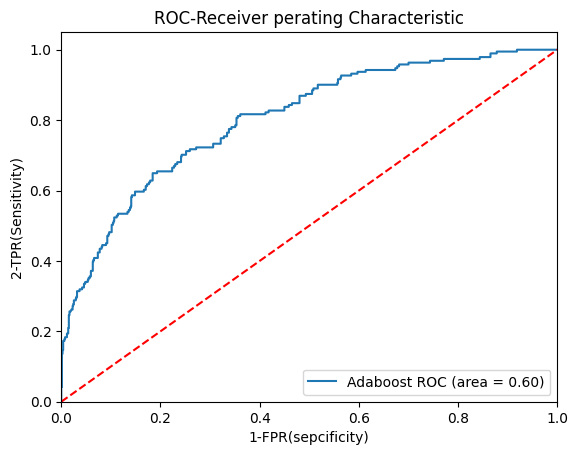

In [74]:
#plotting roc auc curve:
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure()

#adding models to list to be seen on roc plot
auc_models = [{
   'label': 'Adaboost',
   'model': AdaBoostClassifier(n_estimators=90, algorithm='SAMME'),
   'auc' : 0.6049
}]


#loop through model:
for algorithm in auc_models:
  model = algorithm['model']
  model.fit(X_train, y_train)
  #finding fpr and tpr
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

  #area under curve:
  plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' %(algorithm['label'], algorithm['auc']))

#setting for plot:
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-FPR(sepcificity)')
plt.ylabel('2-TPR(Sensitivity)')
plt.title('ROC-Receiver perating Characteristic')
plt.legend(loc='lower right')
plt.savefig('auc.png')
plt.show()